<a href="https://colab.research.google.com/github/AestheticPranav/Data-Analytsics/blob/main/miniproject_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the forest fire data
df = pd.read_csv('/content/drive/MyDrive/Data Analytics/forestfires.csv')



In [3]:
# Q1: Top 10 maximum burnt areas with month
top_burnt_area = df[['month', 'area']].nlargest(10, 'area')
print("Top 10 maximum burnt areas by month:\n", top_burnt_area)




Top 10 maximum burnt areas by month:
     month     area
238   sep  1090.84
415   aug   746.28
479   jul   278.53
237   sep   212.88
236   sep   200.94
235   aug   196.48
420   aug   185.76
377   aug   174.63
234   sep   154.88
233   sep   105.66


In [4]:


# Q2: Highest and lowest temperature for each month
temp_stats = df.groupby('month')['temp'].agg(['max', 'min']).reset_index()
temp_stats.columns = ['month', 'highest_temp', 'lowest_temp']
print("\nHighest and lowest temperatures for each month:\n", temp_stats)




Highest and lowest temperatures for each month:
    month  highest_temp  lowest_temp
0    apr          17.6          5.8
1    aug          33.3          5.1
2    dec           5.1          2.2
3    feb          15.7          4.2
4    jan           5.3          5.2
5    jul          30.2         12.6
6    jun          28.0         10.6
7    mar          18.8          5.3
8    may          18.0         11.3
9    nov          11.8         11.8
10   oct          21.7         11.3
11   sep          30.2          9.8


In [5]:


# Q3: Monthly highest and lowest wind speeds
wind_stats = df.groupby('month')['wind'].agg(['max', 'min']).reset_index()
wind_stats.columns = ['month', 'highest_wind', 'lowest_wind']
print("\nMonthly highest and lowest wind speeds:\n", wind_stats)




Monthly highest and lowest wind speeds:
    month  highest_wind  lowest_wind
0    apr           9.4          1.8
1    aug           8.9          0.4
2    dec           8.5          4.9
3    feb           9.4          0.9
4    jan           3.1          0.9
5    jul           8.0          0.9
6    jun           9.4          1.3
7    mar           9.4          0.9
8    may           4.9          4.0
9    nov           4.5          4.5
10   oct           5.4          0.9
11   sep           7.6          0.9


In [6]:

# Q4: Highest and lowest relative humidity for each month
humidity_stats = df.groupby('month')['RH'].agg(['max', 'min']).reset_index()
humidity_stats.columns = ['month', 'highest_rh', 'lowest_rh']
print("\nHighest and lowest relative humidity for each month:\n", humidity_stats)




Highest and lowest relative humidity for each month:
    month  highest_rh  lowest_rh
0    apr          75         20
1    aug          96         19
2    dec          61         21
3    feb          82         35
4    jan         100         78
5    jul          90         22
6    jun          90         25
7    mar          99         18
8    may          94         40
9    nov          31         31
10   oct          60         24
11   sep          86         15


In [7]:


# Q5: Join results from Q1-Q4
merged_data = pd.merge(top_burnt_area, temp_stats, on='month', how='left')
merged_data = pd.merge(merged_data, wind_stats, on='month', how='left')
merged_data = pd.merge(merged_data, humidity_stats, on='month', how='left')
print("\nMerged data from Q1 to Q4:\n", merged_data)





Merged data from Q1 to Q4:
   month     area  highest_temp  lowest_temp  highest_wind  lowest_wind  \
0   sep  1090.84          30.2          9.8           7.6          0.9   
1   aug   746.28          33.3          5.1           8.9          0.4   
2   jul   278.53          30.2         12.6           8.0          0.9   
3   sep   212.88          30.2          9.8           7.6          0.9   
4   sep   200.94          30.2          9.8           7.6          0.9   
5   aug   196.48          33.3          5.1           8.9          0.4   
6   aug   185.76          33.3          5.1           8.9          0.4   
7   aug   174.63          33.3          5.1           8.9          0.4   
8   sep   154.88          30.2          9.8           7.6          0.9   
9   sep   105.66          30.2          9.8           7.6          0.9   

   highest_rh  lowest_rh  
0          86         15  
1          96         19  
2          90         22  
3          86         15  
4          86        

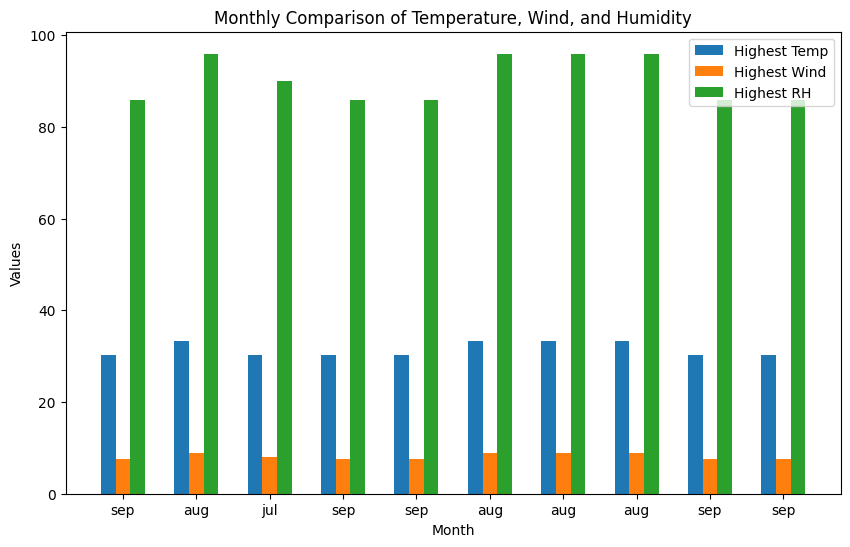

In [8]:
# Q6: Plotting a grouped bar chart
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(merged_data['month']))
width = 0.2

bar1 = ax.bar(x - width, merged_data['highest_temp'], width, label='Highest Temp')
bar2 = ax.bar(x, merged_data['highest_wind'], width, label='Highest Wind')
bar3 = ax.bar(x + width, merged_data['highest_rh'], width, label='Highest RH')

ax.set_xlabel('Month')
ax.set_ylabel('Values')
ax.set_title('Monthly Comparison of Temperature, Wind, and Humidity')
ax.set_xticks(x)
ax.set_xticklabels(merged_data['month'])
ax.legend()

plt.show()

In [11]:

employee_data = {
    'emp_id': [1, 2, 3, 4, 5, 6, 7],
    'department': ['sales', 'sales', 'sales', 'sales', 'marketing', 'marketing', 'marketing'],
    'salary': [100, 120, 145, 140, 100, 150, 250]
}
not_active_data = {
    'emp_id': [3, 7]  # Sample inactive employees
}

employee_df = pd.DataFrame(employee_data)
not_active_df = pd.DataFrame(not_active_data)

# Q1: Maximum salary for each department (only active employees)
active_employees = employee_df[~employee_df['emp_id'].isin(not_active_df['emp_id'])]
max_salary_by_dept = active_employees.groupby('department')['salary'].max().reset_index()
max_salary_by_dept.columns = ['department', 'max_salary']
print("\nMax salary for each department (only active employees):\n", max_salary_by_dept)




Max salary for each department (only active employees):
   department  max_salary
0  marketing         150
1      sales         140


In [12]:
# Q2: All employees with department max salary
all_employees = employee_df.merge(max_salary_by_dept, on='department', suffixes=('', '_max'))
print("\nAll employees with department max salary:\n", all_employees)



All employees with department max salary:
    emp_id department  salary  max_salary
0       1      sales     100         140
1       2      sales     120         140
2       3      sales     145         140
3       4      sales     140         140
4       5  marketing     100         150
5       6  marketing     150         150
6       7  marketing     250         150
